In [36]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [2]:
device = '/GPU:0' if len(tf.config.list_physical_devices('GPU')) > 0 else '/CPU:0'
device

'/GPU:0'

In [39]:
training_dataset_path = 'data/dataset.csv'
training_df = pd.read_csv(training_dataset_path)
training_df.shape

(8709, 68)

In [4]:
training_text = training_df['Title']

features = training_df.columns[1:]
training_labels = training_df[features]

In [5]:
vocab_size = 5000
max_length = 50
embedding_dimensions = 16
num_classes = training_labels.shape[1]

In [6]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(training_text)

In [7]:
training_sequences = tokenizer.texts_to_sequences(training_text)
training_padded = pad_sequences(training_sequences, maxlen=max_length)

In [56]:
class MyModel(tf.keras.Model):
    
    def __init__(self, vocab_size, embedding_dimensions, max_length, num_classes, name='my_model'):
        super(MyModel, self).__init__(name=name)
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dimensions, input_length=max_length)
        self.flatten = tf.keras.layers.GlobalAveragePooling1D()
        self.dense = tf.keras.layers.Dense(128, activation='relu')
        self.out = tf.keras.layers.Dense(num_classes, activation='softmax')
    
    def call(self, inputs, training=False):
        x = self.embedding(inputs)
        x = self.flatten(x)
        x = self.dense(x)
        return self.out(x)
    
    def model(self):
        inputs = tf.keras.Input(shape=(max_length))
        return tf.keras.Model(inputs=[inputs], outputs=self.call(inputs))

In [57]:
with tf.device(device):
    model = MyModel(vocab_size, embedding_dimensions, max_length, num_classes)
    model.model().summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
embedding_8 (Embedding)      (None, 50, 16)            80000     
_________________________________________________________________
global_average_pooling1d_8 ( (None, 16)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               2176      
_________________________________________________________________
dense_17 (Dense)             (None, 67)                8643      
Total params: 90,819
Trainable params: 90,819
Non-trainable params: 0
_________________________________________________________________


In [58]:
num_epoch = 100
batch_size = 128

with tf.device(device):
    optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
    criterion = tf.keras.losses.CategoricalCrossentropy()
    metrics = ['accuracy', tf.keras.metrics.AUC()]
    model.compile(optimizer=optimizer, loss=criterion, metrics=metrics)
    history = model.fit(training_padded, training_labels, batch_size=batch_size,
                        epochs=num_epoch, verbose=1, validation_split=0.3)

Epoch 1/100
48/48 [==============================] - 1s 13ms/step - loss: 7.3982 - accuracy: 0.0074 - auc_12: 0.5039 - val_loss: 7.8705 - val_accuracy: 0.0034 - val_auc_12: 0.4693
Epoch 2/100
48/48 [==============================] - 0s 8ms/step - loss: 7.3846 - accuracy: 0.0385 - auc_12: 0.6072 - val_loss: 7.8574 - val_accuracy: 0.0540 - val_auc_12: 0.7349
Epoch 3/100
48/48 [==============================] - 0s 8ms/step - loss: 7.3708 - accuracy: 0.3186 - auc_12: 0.7811 - val_loss: 7.8431 - val_accuracy: 0.3303 - val_auc_12: 0.7807
Epoch 4/100
48/48 [==============================] - 0s 8ms/step - loss: 7.3560 - accuracy: 0.4208 - auc_12: 0.7786 - val_loss: 7.8276 - val_accuracy: 0.3303 - val_auc_12: 0.7728
Epoch 5/100
48/48 [==============================] - 0s 8ms/step - loss: 7.3398 - accuracy: 0.4208 - auc_12: 0.7798 - val_loss: 7.8107 - val_accuracy: 0.3303 - val_auc_12: 0.7526
Epoch 6/100
48/48 [==============================] - 0s 8ms/step - loss: 7.3218 - accuracy: 0.4208 - auc

48/48 [==============================] - 0s 8ms/step - loss: 4.6586 - accuracy: 0.4208 - auc_12: 0.8723 - val_loss: 5.5432 - val_accuracy: 0.3303 - val_auc_12: 0.7739
Epoch 47/100
48/48 [==============================] - 0s 8ms/step - loss: 4.6031 - accuracy: 0.4208 - auc_12: 0.8726 - val_loss: 5.5116 - val_accuracy: 0.3303 - val_auc_12: 0.7747
Epoch 48/100
48/48 [==============================] - 0s 8ms/step - loss: 4.5529 - accuracy: 0.4208 - auc_12: 0.8721 - val_loss: 5.4851 - val_accuracy: 0.3303 - val_auc_12: 0.7748
Epoch 49/100
48/48 [==============================] - 0s 8ms/step - loss: 4.5084 - accuracy: 0.4208 - auc_12: 0.8711 - val_loss: 5.4651 - val_accuracy: 0.3303 - val_auc_12: 0.7750
Epoch 50/100
48/48 [==============================] - 0s 8ms/step - loss: 4.4693 - accuracy: 0.4208 - auc_12: 0.8708 - val_loss: 5.4511 - val_accuracy: 0.3303 - val_auc_12: 0.7771
Epoch 51/100
48/48 [==============================] - 0s 8ms/step - loss: 4.4356 - accuracy: 0.4208 - auc_12: 0.8

48/48 [==============================] - 0s 8ms/step - loss: 5.1938 - accuracy: 0.4208 - auc_12: 0.8313 - val_loss: 7.4029 - val_accuracy: 0.3303 - val_auc_12: 0.7501
Epoch 92/100
48/48 [==============================] - 0s 8ms/step - loss: 5.2381 - accuracy: 0.4208 - auc_12: 0.8308 - val_loss: 7.4901 - val_accuracy: 0.3303 - val_auc_12: 0.7494
Epoch 93/100
48/48 [==============================] - 0s 8ms/step - loss: 5.2827 - accuracy: 0.4208 - auc_12: 0.8302 - val_loss: 7.5786 - val_accuracy: 0.3303 - val_auc_12: 0.7489
Epoch 94/100
48/48 [==============================] - 0s 8ms/step - loss: 5.3275 - accuracy: 0.4208 - auc_12: 0.8298 - val_loss: 7.6686 - val_accuracy: 0.3303 - val_auc_12: 0.7491
Epoch 95/100
48/48 [==============================] - 0s 8ms/step - loss: 5.3745 - accuracy: 0.4208 - auc_12: 0.8290 - val_loss: 7.7597 - val_accuracy: 0.3303 - val_auc_12: 0.7493
Epoch 96/100
48/48 [==============================] - 0s 8ms/step - loss: 5.4202 - accuracy: 0.4208 - auc_12: 0.8

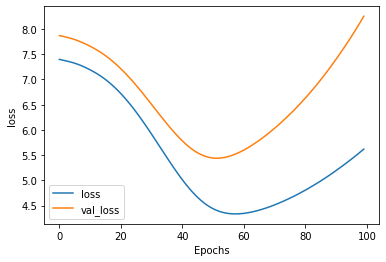

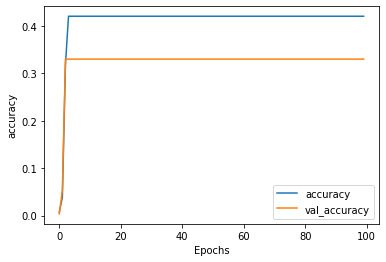

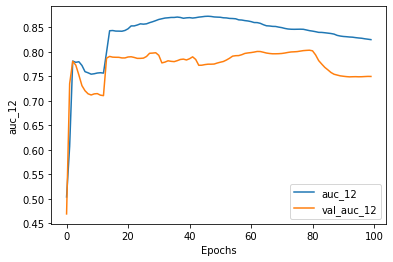

In [59]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

for metric in model.metrics_names:
    plot_graphs(history, metric)

Tokenizer -> [Indobert](https://huggingface.co/indobenchmark/indobert-base-p1)
[Class weight](https://www.kaggle.com/rodsaldanha/multilabel-category-prediction/notebook#Deep-Learning)</br>
Learning rate -> Coursera Course</br>
[Model architecture](https://ieeexplore.ieee.org/abstract/document/8723320)</br>
https://stackoverflow.com/questions/38387913/reason-of-having-high-auc-and-low-accuracy-in-a-balanced-dataset